In [113]:
import arcgis
from arcgis.gis import GIS
from ipywidgets import *
from IPython.display import display
from arcgis.features import use_proximity
from arcgis.features import SpatialDataFrame
import geopandas
import pandas as pd
import numpy as np
import json

In [2]:
gis = GIS(username="nracelis_ucsd5")

Enter password: ········


In [9]:
df_listings = pd.read_csv('Data/airbnb_listings.csv')
df_listings.shape

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(66414, 106)

In [10]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20200216042459,2020-02-16,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.24
1,5396,https://www.airbnb.com/rooms/5396,20200216042459,2020-02-17,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.63
2,7397,https://www.airbnb.com/rooms/7397,20200216042459,2020-02-16,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47
3,7964,https://www.airbnb.com/rooms/7964,20200216042459,2020-02-16,Large & sunny flat with balcony !,Very large & nice apartment all for you! - Su...,hello ! We have a great 75 square meter apartm...,Very large & nice apartment all for you! - Su...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.05
4,9359,https://www.airbnb.com/rooms/9359,20200216042459,2020-02-16,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,NaN


In [3]:
def compute_distance(callback_map, g):
    try:
        arcgis.create_drive_time_areas({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': 257796.17643974972, 'y': 6247003.454824805})
    except:
        print('crash')

In [4]:
def test_click(callback_map, g):
    try:
        print(g)
    except:
        print('notapoint')

<Item title:"airbnb_listings_restricted_v2" type:Feature Layer Collection owner:nracelis_ucsd5>
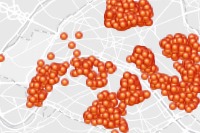

In [11]:
callback_map = gis.map('Paris')
airbnb = gis.content.get('14afc76851064943b7fd61afd009db58')
airbnb

In [7]:
callback_map.add_layer(airbnb)
callback_map.on_click(compute_distance)
callback_map

MapView(layout=Layout(height='400px', width='100%'))

Invalid value for parameter inputLayer - Details : Invalid JSON for GPFeatureRecordSetLayer or GPRecordSet datatype 
Failed.


crash


In [8]:
zipcodes = [75003, 75005, 75007, 75012, 75014, 75016, 75018, 75020]
df_listings_restricted = df_listings[df_listings.zipcode.isin(zipcodes)]
df_listings_restricted_samplesize = round(df_listings_restricted.shape[0] * .20)
df_listings_restricted_sample = df_listings_restricted.sample(df_listings_restricted_samplesize, random_state= 42)
df_listings_restricted_sample.shape

NameError: name 'df_listings' is not defined

In [11]:
df_listings_restricted_sample.to_csv('airbnb_listings_restricted.csv')

In [12]:
(df_listings.zipcode == 75018).sum()

1968

<Item title:"airbnb_listings_restricted_v2" type:Feature Layer Collection owner:nracelis_ucsd5>
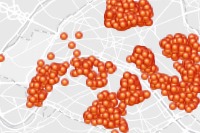

In [13]:
gis.content.get('14afc76851064943b7fd61afd009db58')

In [115]:
test_point = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': 257796.17643974972, 'y': 6247003.454824805}
df_test = SpatialDataFrame.from_dict(test_point).iloc[[0]]
SpatialDataFrame.from_xy(df_test, x_column='x', y_column='y')

AttributeError: 'GeoSeries' object has no attribute '_delete_index'

In [110]:
sdf_test = SpatialDataFrame.from_xy(df_test, x_column = 'x', y_column = 'y', sr=3857)
sdf_test.spatial.set_geometry = 'SHAPE'
type(sdf_test)

AttributeError: 'GeoSeries' object has no attribute '_delete_index'

In [63]:
flayer_test = sdf_test.spatial.to_featurelayer('sdf_test_flayer').query()
flayer_test

<FeatureSet> 1 features

In [107]:
sdf_newtest = SpatialDataFrame.from_dict(test_point)
sdf_newtest.reproject(4326)
sdf_newtest

,spatialReference,x,y
latestWkid,3857,257796.17644,6.247003e+06
wkid,102100,257796.17644,6.247003e+06


In [39]:
flayer_test.features[0]

{"attributes": {"spatialReference": 3857, "x": 257796.17643975, "y": 6247003.45482481, "SHAPE": "\"{'x': 257796.17643974972", "ObjectId": 1}}

In [18]:
test_map = gis.map('Paris')
test_map.add_layer(flayer_test)
test_map

MapView(layout=Layout(height='400px', width='100%'))

In [52]:
#arcgis.create_drive_time_areas(
#    fset.features[0].as_dict, [5], travel_mode='Walking'
#)
SpatialDataFrame.reproject()

TypeError: reproject() missing 2 required positional arguments: 'self' and 'spatial_reference'

In [20]:
tourist_flayer = gis.content.get('8ce9d7f23e084aedbc2466b6832fbb98')

In [21]:
json.loads(tourist_flayer.layers[0].query().to_json)

{'features': [{'geometry': {'x': 255618.99486667092, 'y': 6249519.261326158},
   'attributes': {'Name': 'Centre George Pompidou',
    'Latitude': 48.8504227,
    'Longitude': 2.2962645,
    'Label': 'Museum',
    'Sub_label': 'Tourist1',
    'ObjectId': 1}},
  {'geometry': {'x': 265576.1225679624, 'y': 6257165.140586452},
   'attributes': {'Name': "Cité des sciences et de l'industrie",
    'Latitude': 48.8955983,
    'Longitude': 2.3857109,
    'Label': 'Museum',
    'Sub_label': 'Tourist3',
    'ObjectId': 2}},
  {'geometry': {'x': 255238.4714512923, 'y': 6268562.827525429},
   'attributes': {'Name': 'Louvres',
    'Latitude': 48.9628657,
    'Longitude': 2.2928462,
    'Label': 'Museum',
    'Sub_label': 'Tourist1',
    'ObjectId': 3}},
  {'geometry': {'x': 261962.54718147469, 'y': 6252263.077023849},
   'attributes': {'Name': 'Musée des arts et métiers',
    'Latitude': 48.8666392,
    'Longitude': 2.3532496,
    'Label': 'Museum',
    'Sub_label': 'Tourist3',
    'ObjectId': 4}},
 

In [22]:
flayer_test_dict

NameError: name 'flayer_test_dict' is not defined

In [85]:
test_point = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 'x': 257796.17643974972, 'y': 6247003.454824805}
test_point['x'] = 2.3158225
test_point['y'] = 48.8355492
test_point['spatialReference']['latestWkid'] = 4326
test_point['spatialReference']['wkid'] = 4326
test_point

{'spatialReference': {'latestWkid': 4326, 'wkid': 4326},
 'x': 2.3158225,
 'y': 48.8355492}

In [86]:
from arcgis.features import Feature, FeatureSet
features = [Feature(geometry=test_point, attributes={'name': 'my_location'})]
fset = FeatureSet(
    features=features, 
    geometry_type='esriGeometryPoint',
    spatial_reference = 3857
)

In [94]:
fset

<FeatureSet> 1 features

In [ ]:
#fset_sdf = fset.sdf
#fset_flayer = fset_sdf.spatial.to_featurelayer(title='test_2')
#fset_flayer
test_df = pd.DataFrame(test_point)
test_df2 = pd.DataFrame.spatial.from_xy(test_df, x_column = 'x', y_column='y')
test_df2.to_csv("test_2.csv")

In [ ]:
#test_df2.spatial.to_featureclass("test.shp", overwrite=True)
test_df2

<Item title:"Single Recommendation Point" type:Feature Layer Collection owner:nracelis_ucsd5>
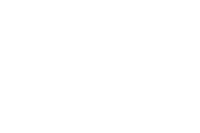

In [43]:
new_flayer = gis.content.get('1f7d33cd1c8a4a2b886f3d853fe14e16')
new_flayer

In [118]:
new_flayer_drive = arcgis.create_drive_time_areas(
    fset.features[0], [5,10,15], travel_mode='Walking'
)

Exception: Invalid format of input layer. url string, feature service Item, feature service instance or dict supported

In [88]:
new_map = gis.map('Paris')
new_map.add_layer(fset)
new_map

MapView(layout=Layout(height='400px', width='100%'))

In [107]:
json.loads(fset_flayer.layers[0].query().to_json)

{'features': [{'attributes': {'FID': 1,
    'name': 'my_location',
    'OBJECTID': 1}}],
 'objectIdFieldName': 'FID',
 'globalIdFieldName': '',
 'spatialReference': {'wkid': 102100, 'latestWkid': 3857},
 'geometryType': 'esriGeometryPoint',
 'fields': [{'name': 'FID',
   'type': 'esriFieldTypeOID',
   'alias': 'FID',
   'sqlType': 'sqlTypeInteger',
   'domain': None,
   'defaultValue': None},
  {'name': 'name',
   'type': 'esriFieldTypeString',
   'alias': 'name',
   'sqlType': 'sqlTypeNVarchar',
   'length': 255,
   'domain': None,
   'defaultValue': None},
  {'name': 'OBJECTID',
   'type': 'esriFieldTypeInteger',
   'alias': 'OBJECTID',
   'sqlType': 'sqlTypeInteger',
   'domain': None,
   'defaultValue': None}]}

In [92]:
fset.features[0].geometry

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'x': 257796.17643974972,
 'y': 6247003.454824805}

In [100]:
tourist_flayer.layers[0].query().features[0].as_dict

{'geometry': {'x': 255618.99486667092, 'y': 6249519.261326158},
 'attributes': {'Name': 'Centre George Pompidou',
  'Latitude': 48.8504227,
  'Longitude': 2.2962645,
  'Label': 'Museum',
  'Sub_label': 'Tourist1',
  'ObjectId': 1}}

In [110]:
fset_flayer.layers[0].query().sdf

,FID,name,OBJECTID
0,1,my_location,1
